In [ ]:
!pip install music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
filepath = "/content/drive/MyDrive/Colab/Research/archive/"
import os
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)
        
#this will take time to load

print(all_midis)

[<music21.stream.Score 0x7fb0f6c2a3a0>, <music21.stream.Score 0x7fb0f6bf1df0>, <music21.stream.Score 0x7fb0f6c0ec10>, <music21.stream.Score 0x7fb0f6bf12e0>, <music21.stream.Score 0x7fb0f6b86370>, <music21.stream.Score 0x7fb0f6b8efa0>, <music21.stream.Score 0x7fb0f6c545e0>, <music21.stream.Score 0x7fb0f6aec610>, <music21.stream.Score 0x7fb0f6ac16a0>, <music21.stream.Score 0x7fb184e7a0a0>, <music21.stream.Score 0x7fb0f6a6d1f0>, <music21.stream.Score 0x7fb0f6a2e220>, <music21.stream.Score 0x7fb0f6be2220>, <music21.stream.Score 0x7fb0f68bdfa0>, <music21.stream.Score 0x7fb0f6876c70>, <music21.stream.Score 0x7fb0f6812ee0>, <music21.stream.Score 0x7fb0f69fcee0>, <music21.stream.Score 0x7fb0f68766a0>, <music21.stream.Score 0x7fb0f69300d0>, <music21.stream.Score 0x7fb0f6876430>, <music21.stream.Score 0x7fb0f672f8e0>, <music21.stream.Score 0x7fb0f6791070>, <music21.stream.Score 0x7fb0f6a32d00>, <music21.stream.Score 0x7fb0f6b8ec40>, <music21.stream.Score 0x7fb0f6a3bc40>, <music21.stream.Score 0x

In [ ]:
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        if songs != None:
          for part in songs.parts:
              pick = part.recurse()
              for element in pick:
                  if isinstance(element, note.Note):
                      notes.append(str(element.pitch))
                  elif isinstance(element, chord.Chord):
                      notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the midi", len(Corpus))
print("Notes of the MIDI file",Corpus[:10])
print("Now as you see we have our music notes/chords in the corpus format.")

Total notes in all the midi 174
Notes of the MIDI file ['1.5', '10.1', 'C#3', 'G#5', 'F5', 'E-3', 'E-5', 'F5', 'E-5', 'C#5']
Now as you see we have our music notes/chords in the corpus format.


In [ ]:
!apt-get -y install lilypond

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  ghostscript libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libgs9 libgs9-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libidn11 libijs-0.35
  libio-html-perl libio-socket-ssl-perl libjbig2dec0 libkpathsea6
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl libptexenc1
  libpython2-stdlib libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libtext-unidecode-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl libxml-libxml-perl libxml-namespacesupport-pe

J: 1
chord_snip: <music21.chord.Chord C#>
J: 5
chord_snip: <music21.chord.Chord C# F>
J: 10
chord_snip: <music21.chord.Chord B->
J: 1
chord_snip: <music21.chord.Chord B- C#>
J: 1
chord_snip: <music21.chord.Chord C#>
J: 5
chord_snip: <music21.chord.Chord C# F>
J: 10
chord_snip: <music21.chord.Chord B->
J: 1
chord_snip: <music21.chord.Chord B- C#>
J: 1
chord_snip: <music21.chord.Chord C#>
J: 5
chord_snip: <music21.chord.Chord C# F>
J: 10
chord_snip: <music21.chord.Chord B->
J: 1
chord_snip: <music21.chord.Chord B- C#>
J: 1
chord_snip: <music21.chord.Chord C#>
J: 5
chord_snip: <music21.chord.Chord C# F>
J: 10
chord_snip: <music21.chord.Chord B->
J: 1
chord_snip: <music21.chord.Chord B- C#>
<music21.stream.Stream 0x7fb0f5dc4820>


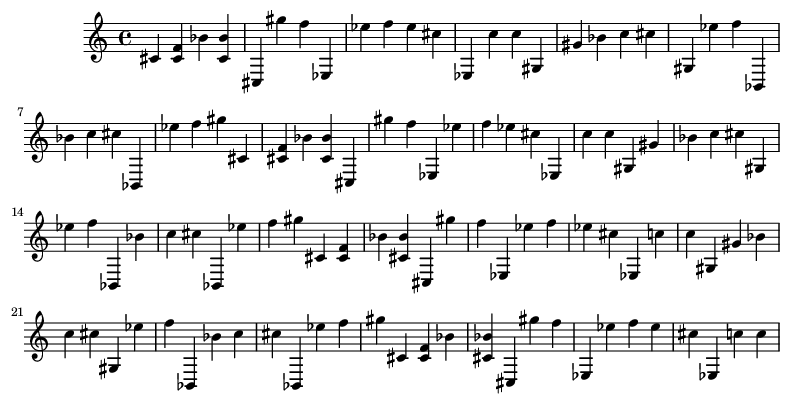

In [ ]:
def show(music):
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                print("J:", j)
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                print("chord_snip:",chord_snip)
                Melody.append(chord_snip)
              
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(Corpus[:100])
print(Melody_Snippet)
show(Melody_Snippet)

In [ ]:
# NN
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592305 sha256=312d1bc1293f806acb2f19595d812e0af60ca951fe95eb685cba83b88aef3f17
  Stored in directory: /root/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f
Successfully built pretty_midi


In [ ]:
import pretty_midi
import os

# sample_file = "/content/drive/MyDrive/Colab/Research/archive/1.mid"

# midi_file = pretty_midi.PrettyMIDI(sample_file)
# print(midi_file)
# print('Number of instruments:', len(midi_file.instruments))

DATA_DIR = "/content/drive/MyDrive/Colab/Research/archive/"
 
for filename in os.listdir(DATA_DIR):
  if filename.endswith(".mid"):
    file_path = os.path.join(DATA_DIR, filename)
    midi_file = pretty_midi.PrettyMIDI(file_path)
    # print('Number of instruments:', filename,": ", len(midi_file.instruments))

/usr/local/lib/python3.9/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [ ]:
import collections
import pandas as pd
import numpy as np

def midi_file_to_notes(midi_file):
    midi_notes = sorted(midi_file.instruments[0].notes, key=lambda note: note.start)
    # Defaultdict creates items you're trying to access if they aren't already in the dict, instead of throwing an error
    notes = collections.defaultdict(list) 
    prev_start = midi_notes[0].start

    for note in midi_notes:
        # Each note has start, end, pitch
        # The features we want each note to have are (pitch, step, duration). These can be calculated from the values above
        notes['pitch'].append(note.pitch)
        notes['step'].append(note.start - prev_start)
        notes['duration'].append(note.end - note.start)
    return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
all_notes = []

for filename in os.listdir(DATA_DIR):
    file_path = os.path.join(DATA_DIR, filename)
    midi_file = pretty_midi.PrettyMIDI(file_path)
    all_notes.append(midi_file_to_notes(midi_file))

# flatten the data
all_notes = pd.concat(all_notes)
print(all_notes)
n_notes = len(all_notes)
print(n_notes)

/usr/local/lib/python3.9/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


    pitch      step  duration
0      78  0.000000  0.173958
1      74  0.009896  0.156771
2      67  0.019792  0.107812
3      71  0.022396  0.121875
4      90  0.304688  0.226562
..    ...       ...       ...
8      66  1.128125  0.546875
9      64  1.617188  1.440625
10     62  3.009896  0.138542
11     57  3.116146  1.933333
12     59  5.065625  1.975521

[4060 rows x 3 columns]
4060


In [ ]:
import tensorflow as tf

train_tf_dataset = tf.data.Dataset.from_tensor_slices(all_notes)

train_tf_dataset.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
key_order = ['pitch', 'step', 'duration']

def create_sequences(dataset: tf.data.Dataset, seq_length: int, vocab_size = 128):
    # Sequence length should be 1 longer because format of the window is 
    # [inputNote1, inputNote2, ... inputNoteN, label]
    # Where N = seq_length
    seq_length += 1

    windows = dataset.window(seq_length, shift=1, stride=1, drop_remainder=True)
    flatten = lambda x: x.batch(seq_length, drop_remainder=True)
    sequences = windows.flat_map(flatten)

    # Normalize note pitch
    def scale_pitch(x):
        x = x/[vocab_size,1.0,1.0]
        return x

    # Split the notes
    def split_notes(sequences):
        inputs = sequences[:-1] # inputs to the network
        labels = sequences[-1]
        labels = {key:labels[i] for i,key in enumerate(key_order)}
        return scale_pitch(inputs), labels

    return sequences.map(split_notes, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_length = 16
vocab_size = 128 # Number of possible notes 
seq_dataset = create_sequences(train_tf_dataset, seq_length, vocab_size)
seq_dataset.element_spec

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(TensorSpec(shape=(16, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
batch_size = 20
train_dataset = (seq_dataset
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
    mse = (y_true - y_pred) ** 2
    positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
    return tf.reduce_mean(mse + positive_pressure)

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
    'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
    'step': tf.keras.layers.Dense(1, name='step')(x),
    'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 128)          67584       ['input_1[0][0]']                
                                                                                                  
 duration (Dense)               (None, 1)            129         ['lstm[0][0]']                   
                                                                                                  
 pitch (Dense)                  (None, 128)          16512       ['lstm[0][0]']                   
                                                                                              

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/kaggle/working/',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

epochs = 50

history = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
202/202 [==============================] - 11s 31ms/step - loss: 8.4429 - duration_loss: 0.5275 - pitch_loss: 4.1486 - step_loss: 3.7667
Epoch 2/50
202/202 [==============================] - 4s 17ms/step - loss: 6.6975 - duration_loss: 0.3303 - pitch_loss: 3.9883 - step_loss: 2.3788
Epoch 3/50
202/202 [==============================] - 5s 23ms/step - loss: 6.5117 - duration_loss: 0.2587 - pitch_loss: 3.9399 - step_loss: 2.3130
Epoch 4/50
202/202 [==============================] - 4s 21ms/step - loss: 6.4405 - duration_loss: 0.2295 - pitch_loss: 3.9305 - step_loss: 2.2804
Epoch 5/50
202/202 [==============================] - 4s 18ms/step - loss: 6.2880 - duration_loss: 0.2313 - pitch_loss: 3.8957 - step_loss: 2.1610
Epoch 6/50
202/202 [==============================] - 4s 22ms/step - loss: 6.2595 - duration_loss: 0.2193 - pitch_loss: 3.8847 - step_loss: 2.1555
Epoch 7/50
202/202 [==============================] - 4s 21ms/step - loss: 6.2766 - duration_loss: 0.2327 - pitch_los

In [ ]:
def predict_next_note(notes: np.ndarray, keras_model: tf.keras.Model, temperature: float = 1.25):
    # Add batch dimension
    inputs = tf.expand_dims(notes, 0)

    predictions = model.predict(inputs)
    pitch_logits = predictions['pitch']
    step = predictions['step']
    duration = predictions['duration']

    pitch_logits /= temperature
    pitch = tf.random.categorical(pitch_logits, num_samples=1)
    pitch = tf.squeeze(pitch, axis=-1)
    duration = tf.squeeze(duration, axis=-1)
    step = tf.squeeze(step, axis=-1)

    # `step` and `duration` values should be non-negative
    step = tf.maximum(0, step)
    duration = tf.maximum(0, duration)

    return int(pitch), float(step), float(duration)

In [ ]:
num_predictions = 120

sample_file = pretty_midi.PrettyMIDI("/content/drive/MyDrive/Colab/Research/archive/1.mid")
raw_notes = midi_file_to_notes(sample_file)
sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training sequences
input_notes = (sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
    pitch, step, duration = predict_next_note(input_notes, model)
    start = prev_start + step
    end = start + duration
    input_note = (pitch, step, duration)
    generated_notes.append((*input_note, start, end))
    input_notes = np.delete(input_notes, 0, axis=0)
    input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
    prev_start = start

generated_notes = pd.DataFrame(generated_notes, columns=(*key_order, 'start', 'end'))
print(generated_notes)

1/1 [==============================] - 0s 24ms/step
     pitch      step  duration       start         end
0       74  2.191046  0.168577    2.191046    2.359623
1       66  6.317410  1.605129    8.508457   10.113585
2       79  6.796447  1.732358   15.304904   17.037262
3       79  6.805149  1.747500   22.110053   23.857553
4       79  6.789744  1.789281   28.899797   30.689078
..     ...       ...       ...         ...         ...
115     79  5.204855  1.619352  621.973342  623.592694
116     75  5.204193  1.619266  627.177535  628.796800
117     79  5.208384  1.619155  632.385918  634.005073
118     72  5.203129  1.619119  637.589047  639.208166
119     74  5.210711  1.619046  642.799757  644.418803

[120 rows x 5 columns]


In [ ]:
def notes_to_midi(notes: pd.DataFrame, out_file: str, instrument_name: str, velocity: int = 100):
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=pretty_midi.instrument_name_to_program(instrument_name))

    prev_start = 0
    for i, note in notes.iterrows():
        start = float(prev_start + note['step'])
        end = float(start + note['duration'])
        note = pretty_midi.Note(
            velocity=velocity,
            pitch=int(note['pitch']),
            start=start,
            end=end,
        )
        instrument.notes.append(note)
        prev_start = start

    pm.instruments.append(instrument)
    pm.write(out_file)
    return pm

In [ ]:
out_file = 'output.mid'
instrument = midi_file.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
out_pm = notes_to_midi(generated_notes, out_file=out_file, instrument_name=instrument_name)

In [ ]:
out_file

'output.mid'